<a href="https://colab.research.google.com/github/Sudorenkoroma/HW_GI_ML/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Параметри
max_features = 20000  # Розмір словника
max_len = 500  # Максимальна довжина рецензії
embedding_dim = 64

In [3]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Функція для побудови графіків
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Втрата
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Точність
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [5]:
# Модель RNN
def build_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(SimpleRNN(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Модель LSTM
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Двостороння LSTM
def build_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Глибока LSTM
def build_deep_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dim, input_length=max_len))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Навчання та оцінка моделей
models = {
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "Bidirectional LSTM": build_bidirectional_lstm_model(),
    "Deep LSTM": build_deep_lstm_model()
}


In [10]:
# Рання зупинка
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Збереження найкращої моделі
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='min')

In [11]:
histories = {}
for name, model in models.items():
    print(f"Training {name} model...")
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1,  callbacks=[early_stopping, checkpoint])
    histories[name] = history
    score, acc = model.evaluate(x_test, y_test, batch_size=64)
    print(f"{name} model - Test accuracy: {acc}")

Training RNN model...
Epoch 1/5
352/352 [==============================] - 48s 133ms/step - loss: 0.5881 - accuracy: 0.6713 - val_loss: 0.4570 - val_accuracy: 0.7928
Epoch 2/5
  1/352 [..............................] - ETA: 45s - loss: 0.4496 - accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - 47s 132ms/step - loss: 0.4255 - accuracy: 0.8098 - val_loss: 0.4514 - val_accuracy: 0.8040
Epoch 3/5
352/352 [==============================] - 46s 131ms/step - loss: 0.3619 - accuracy: 0.8452 - val_loss: 0.4434 - val_accuracy: 0.8196
Epoch 4/5
352/352 [==============================] - 45s 128ms/step - loss: 0.2936 - accuracy: 0.8813 - val_loss: 0.4606 - val_accuracy: 0.8088
Epoch 5/5
391/391 [==============================] - 11s 29ms/step - loss: 0.4427 - accuracy: 0.8156
RNN model - Test accuracy: 0.8156399726867676
Training LSTM model...
Epoch 1/5
352/352 [==============================] - 88s 244ms/step - loss: 0.4414 - accuracy: 0.7920 - val_loss: 0.3789 - val_accuracy: 0.8616
Epoch 2/5
352/352 [==============================] - 86s 245ms/step - loss: 0.2365 - accuracy: 0.9090 - val_loss: 0.3599 - val_accuracy: 0.8424
Epoch 3/5
352/352 [==============================] - 87s 246ms/step - loss: 0.1646 - accuracy: 0.9431 - val_loss: 0.3422

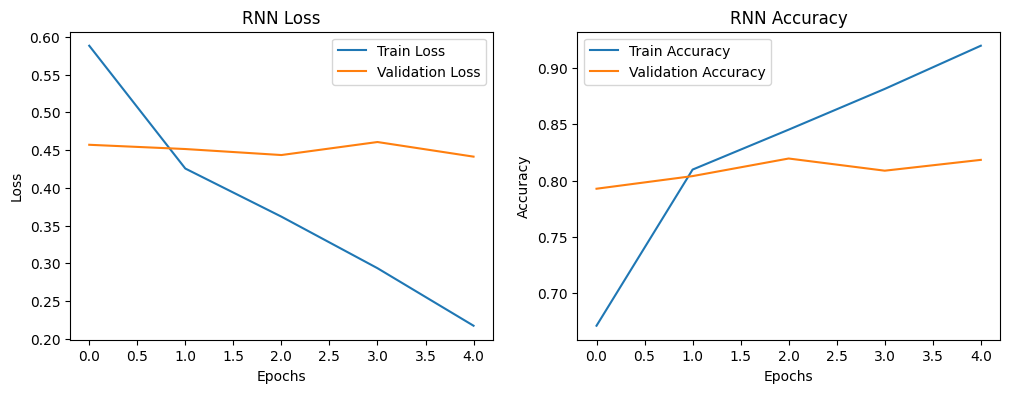

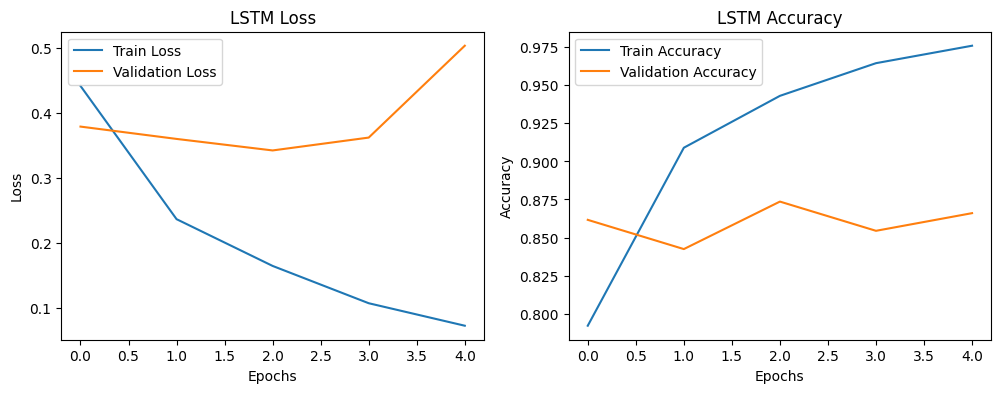

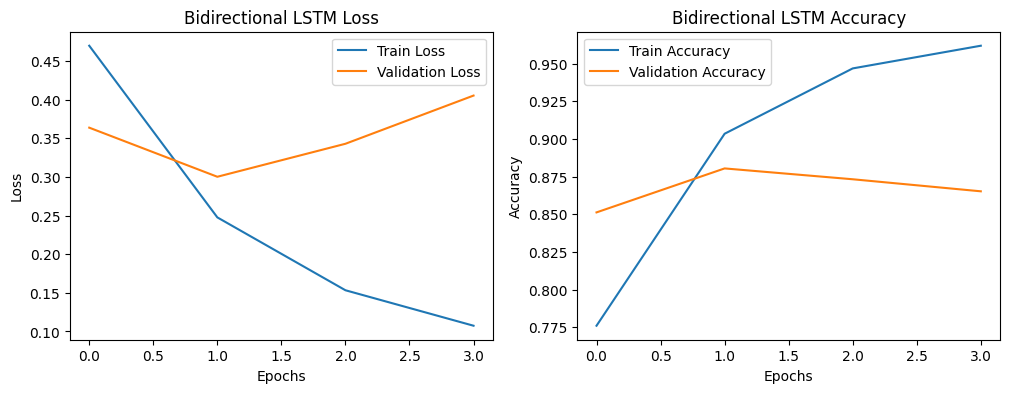

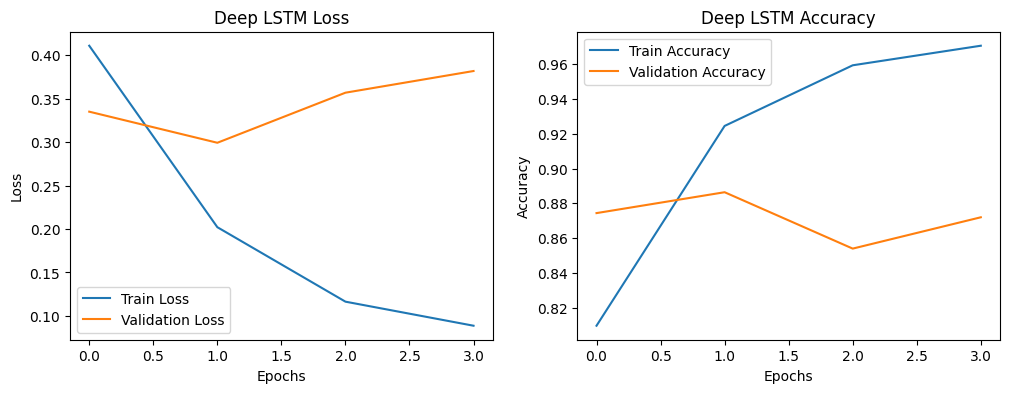

In [12]:
# Відображення графіків
for name, history in histories.items():
    plot_history(history, name)

In [15]:
# Кодування та класифікація кастомного тексту
custom_text = "I thought the movie was going to be bad. but it was actually amazing"


tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([custom_text])
custom_text_sequence = tokenizer.texts_to_sequences([custom_text])
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_len)

# Класифікація кастомного тексту для кожної моделі
for name, model in models.items():
    prediction = model.predict(custom_text_padded)
    print(f"{name} model - Custom text prediction: {prediction[0][0]}")

1/1 [==============================] - 0s 32ms/step
RNN model - Custom text prediction: 0.7071369886398315
1/1 [==============================] - 0s 34ms/step
LSTM model - Custom text prediction: 0.23718476295471191
1/1 [==============================] - 0s 45ms/step
Bidirectional LSTM model - Custom text prediction: 0.593234658241272
1/1 [==============================] - 0s 46ms/step
Deep LSTM model - Custom text prediction: 0.6745502352714539


In [18]:
# Кодування та класифікація кастомного тексту
custom_text_2 = "I thought the movie was going to be amazing. but it was actually bad"


tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts([custom_text_2])
custom_text_sequence = tokenizer.texts_to_sequences([custom_text_2])
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_len)

# Класифікація кастомного тексту для кожної моделі
for name, model in models.items():
    prediction = model.predict(custom_text_padded)
    print(f"{name} model - Custom text prediction: {prediction[0][0]}")

1/1 [==============================] - 0s 32ms/step
RNN model - Custom text prediction: 0.7071369886398315
1/1 [==============================] - 0s 37ms/step
LSTM model - Custom text prediction: 0.23718476295471191
1/1 [==============================] - 0s 35ms/step
Bidirectional LSTM model - Custom text prediction: 0.593234658241272
1/1 [==============================] - 0s 47ms/step
Deep LSTM model - Custom text prediction: 0.6745502352714539


In [19]:
# як показує резульат, більш складні моделі показують кращі результати на валідаційних наборах
# Але як показує практика на більш життєвому прикладі модель не розрізняє різниці в значені тексту, від парестановки слів.
# Тобто модель досит добре показала результати на навчальних наборах даних, але для використання в реальних умовах її не достатно.
# потрібна складніша архітектура.